In [1]:
import pathlib
import datetime
import json

from matplotlib import pyplot as plt
import numpy as np

In [2]:
ROOT_DIR = pathlib.Path('/home/michel/projects/desinfo/political-ads-scraper')

In [3]:
data = {}

start_date = datetime.date(2019, 5, 10)
current_date = start_date
today = datetime.date.today()
dates = []
while current_date <= today:
    file_path = ROOT_DIR / 'data/facebook/reports/FR' / str(current_date) / 'data.json'
    if file_path.is_file():
        dates.append(current_date)
        with open(file_path, 'r') as f:
            data[current_date] = json.load(f)
    current_date += datetime.timedelta(1)


In [4]:
data.keys()

dict_keys([datetime.date(2019, 5, 10), datetime.date(2019, 5, 11), datetime.date(2019, 5, 12), datetime.date(2019, 5, 13), datetime.date(2019, 5, 14), datetime.date(2019, 5, 15), datetime.date(2019, 5, 16), datetime.date(2019, 5, 17), datetime.date(2019, 5, 18), datetime.date(2019, 5, 19), datetime.date(2019, 5, 20), datetime.date(2019, 5, 21), datetime.date(2019, 5, 22), datetime.date(2019, 5, 23), datetime.date(2019, 5, 24), datetime.date(2019, 5, 25), datetime.date(2019, 5, 26), datetime.date(2019, 5, 27), datetime.date(2019, 5, 28), datetime.date(2019, 5, 29), datetime.date(2019, 5, 30), datetime.date(2019, 5, 31), datetime.date(2019, 6, 1), datetime.date(2019, 6, 2), datetime.date(2019, 6, 3), datetime.date(2019, 6, 5), datetime.date(2019, 6, 6), datetime.date(2019, 6, 7), datetime.date(2019, 6, 8), datetime.date(2019, 6, 9), datetime.date(2019, 6, 10), datetime.date(2019, 6, 12), datetime.date(2019, 6, 13), datetime.date(2019, 6, 14), datetime.date(2019, 6, 15), datetime.date(201

In [5]:
total_amounts = {}

for date, day_data in data.items():
    total_amounts[date] = day_data['lifetime_data'][str(date-datetime.timedelta(1))]['payload']['totalSpend']


In [6]:

total_amounts[datetime.date(2019, 6, 7)] = (total_amounts[datetime.date(2019, 6, 6)] + total_amounts[datetime.date(2019, 6, 8)])/2

total_amounts[datetime.date(2019, 6, 9)] = (total_amounts[datetime.date(2019, 6, 8)] + total_amounts[datetime.date(2019, 6, 10)])/2

total_amounts[datetime.date(2019, 6, 22)] = (3*total_amounts[datetime.date(2019, 6, 21)] + total_amounts[datetime.date(2019, 6, 25)])/4
total_amounts[datetime.date(2019, 6, 23)] = (2*total_amounts[datetime.date(2019, 6, 21)] + 2*total_amounts[datetime.date(2019, 6, 25)])/4
total_amounts[datetime.date(2019, 6, 24)] = (total_amounts[datetime.date(2019, 6, 21)] + 3*total_amounts[datetime.date(2019, 6, 25)])/4

total_amounts[datetime.date(2019, 6, 26)] = (total_amounts[datetime.date(2019, 6, 25)] + total_amounts[datetime.date(2019, 6, 27)])/2

del total_amounts[datetime.date(2019, 6, 28)]

total_amounts

{datetime.date(2019, 5, 10): 0,
 datetime.date(2019, 5, 11): 0,
 datetime.date(2019, 5, 12): 0,
 datetime.date(2019, 5, 13): 0,
 datetime.date(2019, 5, 14): 868221,
 datetime.date(2019, 5, 15): 889603,
 datetime.date(2019, 5, 16): 910226,
 datetime.date(2019, 5, 17): 956509,
 datetime.date(2019, 5, 18): 1001011,
 datetime.date(2019, 5, 19): 1035871,
 datetime.date(2019, 5, 20): 1095599,
 datetime.date(2019, 5, 21): 1147617,
 datetime.date(2019, 5, 22): 1210438,
 datetime.date(2019, 5, 23): 1293129,
 datetime.date(2019, 5, 24): 1396074,
 datetime.date(2019, 5, 25): 1366611,
 datetime.date(2019, 5, 26): 1425627,
 datetime.date(2019, 5, 27): 1467142,
 datetime.date(2019, 5, 28): 1501395,
 datetime.date(2019, 5, 29): 1510003,
 datetime.date(2019, 5, 30): 1519453,
 datetime.date(2019, 5, 31): 1527992,
 datetime.date(2019, 6, 1): 1534380,
 datetime.date(2019, 6, 2): 1538242,
 datetime.date(2019, 6, 3): 1552034,
 datetime.date(2019, 6, 5): 1550401,
 datetime.date(2019, 6, 6): 1563090,
 dateti

In [7]:
dates = list(total_amounts.keys())
cumsum = np.array(list(total_amounts.values()))

In [8]:
dates_deriv = dates[1:]
by_day = cumsum[1:] - cumsum[:-1]

No handles with labels found to put in legend.


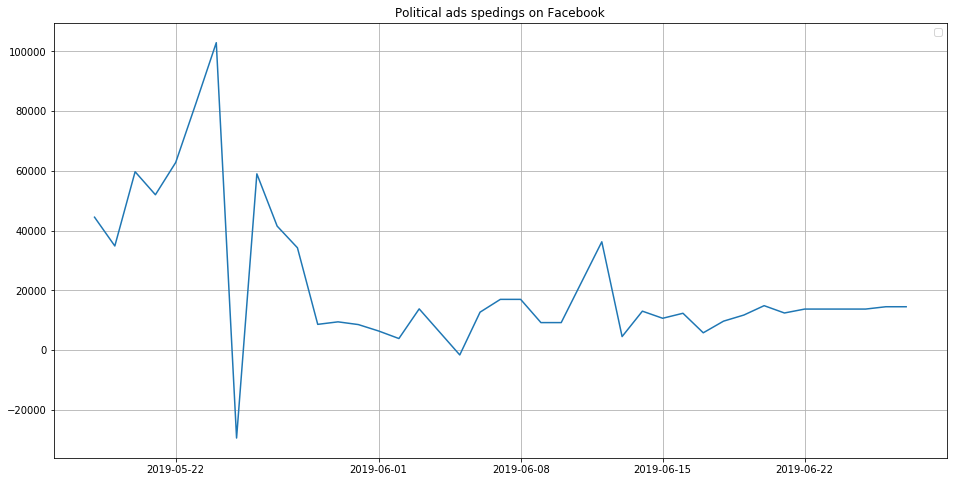

In [9]:

fig, ax = plt.subplots()

plt.plot(dates_deriv[7:], by_day[7:])


plt.title('Political ads spedings on Facebook')
ax.grid(True, which='both')
ax.legend()
fig.set_size_inches(16, 8)